**Supervised Machine Learning**

**Regression:-1   (Linner regression)**

Step-1 Gathering the data

In [ ]:
#importing necessary packages
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Step-2 Data preprocessing/ Data wrangling/ Data cleaning

In [ ]:
#convert the categorical variables into numerical format - using one hot encoding technique
data['sex']=data['sex'].apply({'male':0,'female':1}.get)
data['smoker']=data['smoker'].apply({'yes':1,'no':0}.get)
data['region']=data['region'].apply({'southeast':1,'southwest':2,'northeast':3,'northwest':4}.get)

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,4,21984.47
4,32,0,28.9,0,0,4,3866.86
5,31,1,25.7,0,0,1,3756.62
6,46,1,33.4,1,0,1,8240.59
7,37,1,27.7,3,0,4,7281.51
8,37,0,29.8,2,0,3,6406.41
9,60,1,25.8,0,0,4,28923.14


Step-3 Dividing the clean data into dependent(y) and independent(x) variables

In [ ]:
x=data[['age','sex','bmi','children','smoker','region']] #independent parameters
y=data['expenses'] #dependent parameters

Step-4 Splitting the clean data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating the (MLM- Machine Learning Model) using LinearRegression algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression() #activating the linear regression algorithm

In [ ]:
regression.fit(x_train,y_train) #.fit() used for training the MLM

LinearRegression()

In [ ]:
pedictions=regression.predict(x_test) #.predict() used to predict the future values

In [ ]:
#accuracy of MLM
regression.score(x,y)

0.7500231951423584

Calculating the insurance cost for a new customer

In [ ]:
#Creating dataset for new customer
data_new={'age':65,'sex':1,'bmi':29,'children':2,'smoker':1,'region':3}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
my_data

,age,sex,bmi,children,smoker,region
1,65,1,29,2,1,3


In [ ]:
#Prediction the insurance cost for a new customer
new_predictions=regression.predict(my_data)
print('The health insurance cost for the new customer is ', new_predictions)

The health insurance cost for the new customer is  [38339.43341156]


**Classification:-1  KNN:- K Nearest Neighbours (K= Number Of Neighbours)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
 df=data.drop(['User ID'],axis=1) #remove the unwanted column

In [ ]:
df['Gender']=df['Gender'].apply({'Male':1,'Female':0}.get) #one hot encoding

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

Creating a machine learning model by using KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #here k=3

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.predict(x_test) #y hat (predicted output by MLM(Machine Learning M0del))

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
predictions=knn.predict(x_test)

In [ ]:
#calculating accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[35  4]
 [ 9 12]]


In [ ]:
print(ac)

0.7833333333333333


In [ ]:
data_new={'Gender':1,'Age':26,'EstimatedSalary':99990}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
my_data

,Gender,Age,EstimatedSalary
1,1,26,99990


In [ ]:
new_predictions=knn.predict(my_data)
print('The person will be ', new_predictions)

The person will be  [1]


**Classification:-2 Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/insurance2.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
x=data[['age','sex','bmi','children','smoker','region','charges']] #independent variable
y=data['insuranceclaim']  #dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating a MLM by using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predictions=log_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[ 61  49]
 [ 24 134]]


In [ ]:
print(ac)

0.7276119402985075


In [ ]:
data_new={'age':26,'sex':1,'bmi':23.493,'children':0,'smoker':0,'region':3,'charges':32827.3884}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
my_data

,age,sex,bmi,children,smoker,region,charges
1,26,1,23.493,0,0,3,32827.3884


In [ ]:
new_predictions=log_model.predict(my_data)
print('The person will be ', new_predictions)

The person will be  [1]


**Classification:-3 Decission Tree**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
x=data[['variance','skewness','curtosis','entropy']]
y=data['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier()

In [ ]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_predictions=tree_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,tree_predictions)
ac=accuracy_score(y_test,tree_predictions)

In [ ]:
cm

array([[152,   2],
       [  3, 118]])

In [ ]:
ac

0.9818181818181818

In [ ]:
data_new={'variance':2.39793,'skewness':7.6874,'curtosis':-3.5397,'entropy':2.63810}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
my_data

,variance,skewness,curtosis,entropy
1,2.39793,7.6874,-3.5397,2.6381


In [ ]:
new_predictions=tree_classifier.predict(my_data)
print('The note is',new_predictions)

The note is [0]


**Classification:-4 Random Forest**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
my_data=pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
x=data[['variance','skewness','curtosis','entropy']]
y=data['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier()

In [ ]:
forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
forest_predictions=forest_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,forest_predictions)
ac=accuracy_score(y_test,forest_predictions)

In [ ]:
cm

array([[157,   0],
       [  0, 118]])

In [ ]:
ac

1.0

In [ ]:
data_new={'variance':5.34873,'skewness':8.5443,'curtosis':4.4387,'entropy':3.38573}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
my_data

,variance,skewness,curtosis,entropy
1,5.34873,8.5443,4.4387,3.38573


In [ ]:
new_predictions=forest_classifier.predict(my_data)
print('The note is',new_predictions)

The note is [0]


**Classification:-5  Support Vector Machine(SVM)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Breast_cancer_data.csv')

In [ ]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [ ]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
predictions=svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[24 16]
 [ 2 72]]


In [ ]:
print(ac)

0.8421052631578947


In [ ]:
data_new={'mean_radius':18.27,'mean_texture':22.94,'mean_perimeter':124.46,'mean_area':1212.7,'mean_smoothness':0.18477}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
print(my_data)

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
1        18.27         22.94          124.46     1212.7          0.18477


In [ ]:
new_predictions=svc_model.predict(my_data)
print('The women is',new_predictions)

The women is [0]


**Using Kernel**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Breast_cancer_data.csv')

In [ ]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn import svm
svc_model=svm.SVC(kernel='linear') #we can use RBF(Radial Basis Function), Polynomial etc...

In [ ]:
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
predictions=svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[15  3]
 [ 1 38]]


In [ ]:
print(ac)

0.9298245614035088


In [ ]:
data_new={'mean_radius':27.18,'mean_texture':94.22,'mean_perimeter':464.12,'mean_area':7387.1,'mean_smoothness':1.83346}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
print(my_data)

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
1        27.18         94.22          464.12     7387.1          1.83346


In [ ]:
new_predictions=svc_model.predict(my_data)
print('The women is',new_predictions)

The women is [0]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as snr

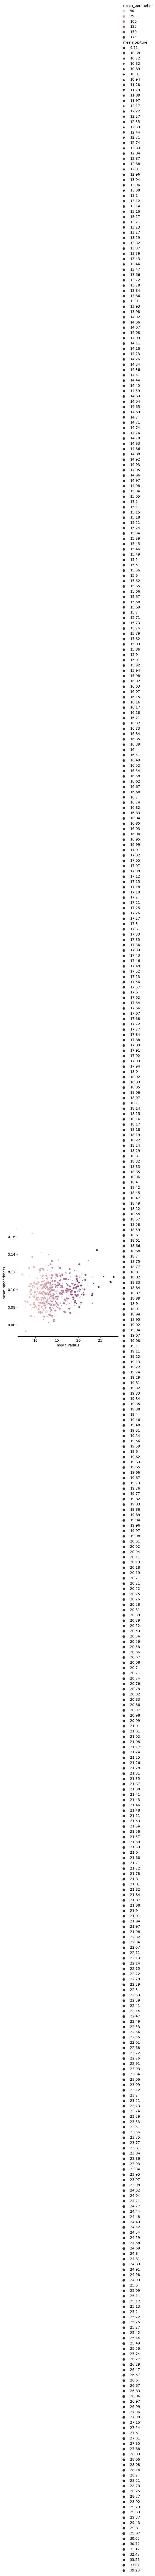

In [ ]:
snr.relplot(x='mean_radius',y='mean_smoothness',hue='mean_perimeter',style='mean_texture',data=data)

**Classification:-5 Dimentionality Reduction(PCA- Principal Component Analysis)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/heart_dataset.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x=data.drop(['target'],axis=1)
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
predictions=knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[10 10]
 [ 8 18]]


In [ ]:
print(ac)

0.6086956521739131


**Use PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [ ]:
x_reduced_train=pd.DataFrame(pca.fit_transform(x_train))
x_reduced_test=pd.DataFrame(pca.fit_transform(x_test))

In [ ]:
x_train.shape

(257, 13)

In [ ]:
x_reduced_train.shape

(257, 10)

In [ ]:
knn.fit(x_reduced_train,y_train)

KNeighborsClassifier()

In [ ]:
new_predictions=knn.predict(x_reduced_test)

In [ ]:
cm=confusion_matrix(y_test,new_predictions)
ac=accuracy_score(y_test,new_predictions)

In [ ]:
print(cm)

[[ 9 11]
 [ 6 20]]


In [ ]:
print(ac)

0.6304347826086957


In [ ]:
x_reduced_train.head()

,0,1,2,3,4,5,6,7,8,9
0,7.124619,-19.759698,7.009236,11.424666,-1.357661,0.303401,-0.076087,0.139183,-0.333561,-0.222024
1,-38.879337,-1.927898,-26.358629,-4.442973,1.943525,1.173302,-1.100936,0.420095,-0.533531,-0.543306
2,-26.716674,-38.976909,3.285315,-2.785021,-0.220929,-0.395340,-0.490109,0.098984,-0.584159,-0.446211
3,21.277650,50.052147,-17.200999,0.066171,0.692378,-0.561088,0.419745,-0.548236,0.507613,0.164892
4,-12.118336,-12.594437,10.241048,-2.858833,-0.080932,0.186507,0.851793,-0.758470,0.234649,0.661809


In [ ]:
data_new={'age':26,'sex':1,'cp':3,'trestbps':140,'chol':280,'fbs':1,'restecg':1,'thalach':180,'exang':1,'oldpeak':2.5,'slope':1,'ca':1,'hal':1}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
print(my_data)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
1   26    1   3       140   280    1        1      180      1      2.5      1   

   ca  hal  
1   1    1  


In [ ]:
new_predictions=knn.predict(my_data)
print('The person is',new_predictions)

**Classification:-6 Naive Baye's**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=data.drop(['User ID'], axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df['Gender']=df['Gender'].apply({'Male':1,'Female':0}.get)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()

In [ ]:
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions=nb_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[43  2]
 [ 6 29]]


In [ ]:
print(ac)

0.9


In [ ]:
data_new={'Gender':1,'Age':26,'EstimatedSalary':98765}

In [ ]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [ ]:
print(my_data)

   Gender  Age  EstimatedSalary
1       1   26            98765


In [ ]:
new_predictions=nb_classifier.predict(my_data)
print('The person is',new_predictions)

The person is [0]
